# ステップ関数の定義

In [1]:
import pickle #mnistデータセット読み出し用
import numpy as np
import matplotlib.pylab as plt
from numpy.random import *
from mpl_toolkits.mplot3d import Axes3D

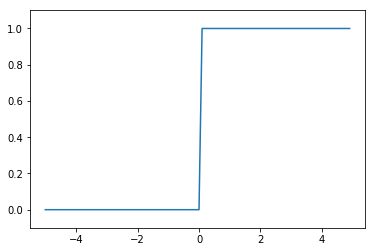

In [2]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.ylim(-0.1, 1.1)
plt.plot(x, y)

In [3]:
# 演算子に該当するリストを0, 1表現に修正する方法
x = np.array([-1.0, 1.0, 2.0])
y = x > 0
print(y)
y = y.astype(np.int)
print(y)

[False  True  True]
[0 1 1]


# シグモイド関数の実装

[[0.73105858 0.88079708 0.95257413]
 [0.98201379 0.99330715 0.99752738]]


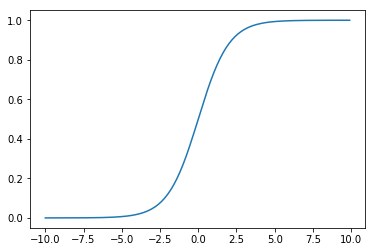

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
x1 = np.array([[1, 2, 3], [4, 5, 6]])
print(sigmoid(x1))
x2 = np.arange(-10, 10, 0.1)
y = sigmoid(x2)
plt.plot(x2, y)

# ReLU(Rectified Linear Unit)関数の実装


$$
    ReLU(x) =
        \begin{cases}
            x \quad x \geqq 0 \\
            0 \quad x < 0 \\
        \end{cases}
$$

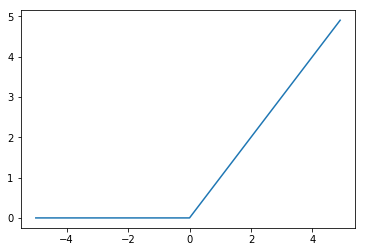

In [5]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5, 5, 0.1)
y = relu(x)
plt.plot(x, y)

# 多次元配列の計算

In [6]:
A = np.array([[1, 2, 3],[4, 5, 6]])
print(A.shape)
print(np.ndim(A))
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B.shape)
print(np.ndim(B))
print(np.dot(A, B))
AT = A.T
BT = B.T
print(np.dot(BT, AT).T)

(2, 3)
2
(3, 2)
2
[[22 28]
 [49 64]]
[[22 28]
 [49 64]]


# 乱数生成

In [7]:
seed(0)
randint(0, 100, (2, 3))

array([[44, 47, 64],
       [67, 67,  9]])

# 順伝播

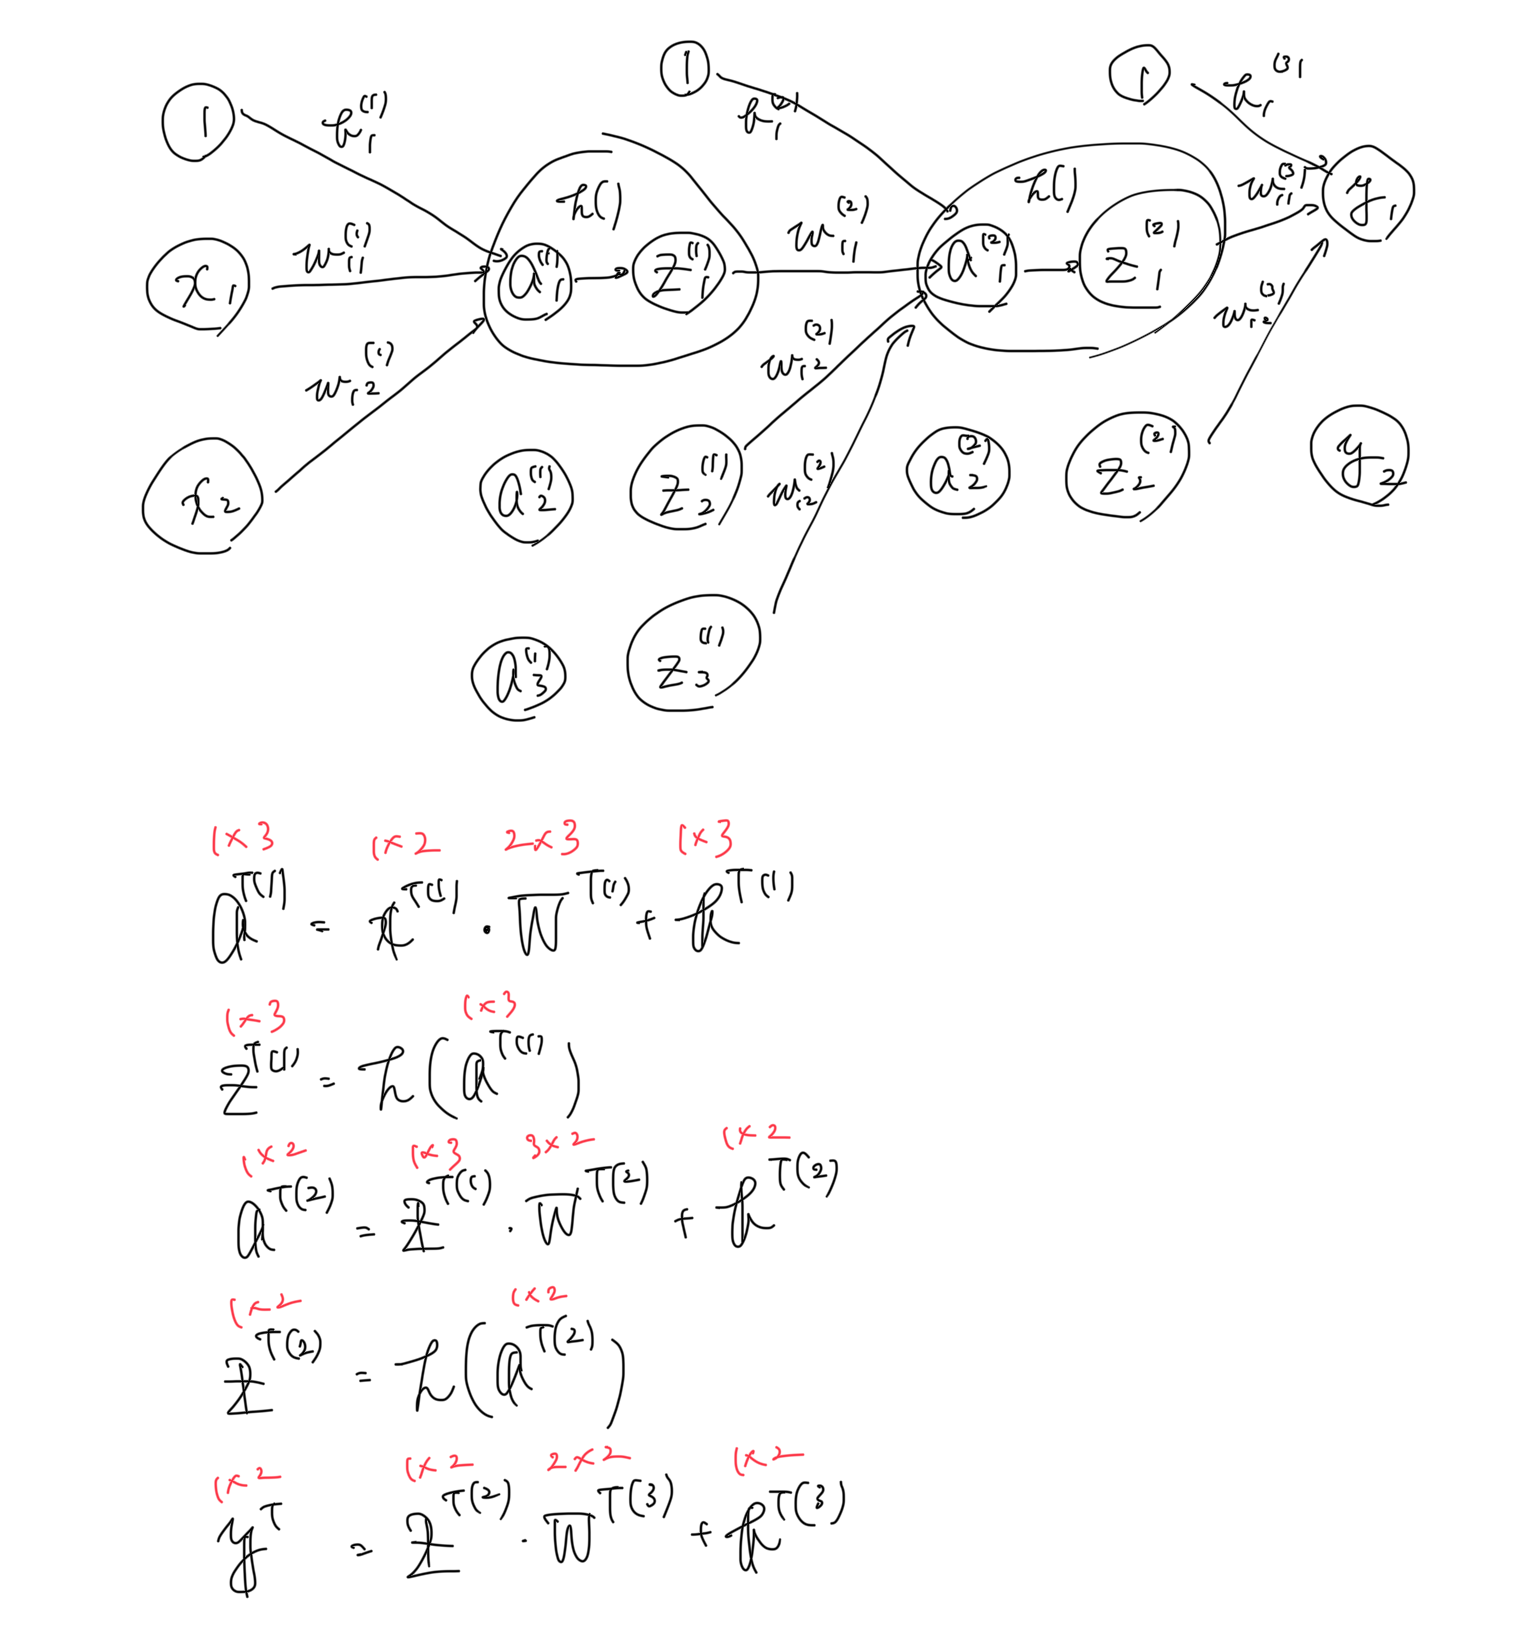

In [8]:
# 定数の定義
seed(0)
W1 = randint(-100, 100, (2, 3))
W2 = randint(-100, 100, (3, 2))
W3 = randint(-100, 100, (2, 2))
b1 = randint(-100, 100, (1, 3))
b2 = randint(-100, 100, (1, 2))
b3 = randint(-100, 100, (1, 2))

#入力値の定義
x = np.array([1, -1])

#1層目
a1 = np.dot(x, W1) + b1
print("a1: {}".format(a1))
z1 = sigmoid(a1)
print("z1: {}".format(z1))

#2層目
a2 = np.dot(z1, W2) + b2
print("a2: {}".format(a2))
z2 = sigmoid(a2)
print("z2: {}".format(z2))

#3層目
y = np.dot(z2, W3) + b3
print("y: {}".format(y))

a1: [[-81 -33  -4]]
z1: [[6.63967720e-36 4.65888615e-15 1.79862100e-02]]
a2: [[-12.23382073 -19.5395863 ]]
z2: [[4.86314314e-06 3.26637084e-09]]
y: [[ 64.99994151 -74.99980517]]


# 順伝播（関数を用いる）

### ソフトマックス関数の実装
$ y = \frac{exp(a_k)}{\sum_{i=0}^{n}exp(a_i)} $
### オーバーフローに関する問題の解決

$ 
    \begin{align}
        y &= \frac{exp(a_k)}{\sum_{i=0}^{n}exp(a_i)} \\
          &= \frac{Cexp(a_k)}{\sum_{i=0}^{n}Cexp(a_i)} \\
          &= \frac{exp(a_k + log C)}{\sum_{i=0}^{n}exp(a_i + log C)} \\
          &= \frac{exp(a_k + C')}{\sum_{i=0}^{n}exp(a_i + C')} \\
          &= \frac{exp(a_k - max(a))}{\sum_{i=0}^{n}exp(a_i - max(a))} \\
     \end{align}
$

と置くことで、大きな数の計算でオーバーフローか起こることを防ぐことができる

In [9]:
#　soft-max関数
def softmax(x):
    # return np.exp(x) / np.sum(np.exp(x))
    return np.exp(x - np.max(x)) / np.sum(np.exp(x - np.max(x)))

In [10]:
x = np.array([[ 1010, 1000, 990]])
print(softmax(x))

[[9.99954600e-01 4.53978686e-05 2.06106005e-09]]


In [11]:
# 初期値を定義する関数
def init_network():
    network = {}
    seed(0)
    network['W1'] = randint(-100, 100, (2, 3))
    network['W2'] = randint(-100, 100, (3, 2))
    network['W3'] = randint(-100, 100, (2, 2))
    network['b1'] = randint(-100, 100, (1, 3))
    network['b2']= randint(-100, 100, (1, 2))
    network['b3']= randint(-100, 100, (1, 2))
    return network

def forword(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
        
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y
        
network = init_network()
x = np.array([1, -1])
y = forword(network, x)
print(y)

[[1.00000000e+00 1.58082047e-61]]


# MNISTデータセットを読み込む関数の定義

In [12]:
#MNISTデータセットの読み込み
def get_mnist_data():
    with open('/Users/takuya.teramoto/Documents/dataset/processed_mnist.pkl', 'rb') as f:
        dataset = pickle.load(f)
    return dataset['train_img'], dataset['train_label'], dataset['test_img'], dataset['test_label']

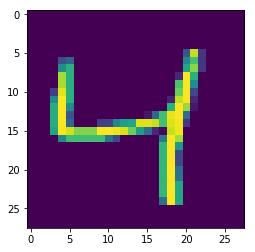

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [13]:
train_img, train_label, test_img, test_label = get_mnist_data()
example = train_img[2].reshape((28, 28))

plt.imshow(example)
plt.show()
train_label[2]

# バッチ処理

In [14]:
batch_size = 100
batch_number = 0
for i in range(0, len(train_img), batch_size):
    train_img_batch = train_img[i:i+batch_size]
    batch_number += 1
#     print("{}th batch: {}".format(batch_number, train_img_batch.shape))

# 損失関数

### 2乗和誤差
$$ E = \frac{1}{2} \sum_{k}(y_k - t_k)^2 \\
 y_k : predict \\
 t_k : answer $$

In [15]:
#例
pred = [0.1, 0.05, 0.6, 0, 0.05, 0.1, 0, 0.1, 0, 0]
ans = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

def mean_squared_error(pred, ans):
    return 0.5 * np.sum((pred - ans)**2)

mean_squared_error(np.array(pred), np.array(ans))

0.09750000000000003

### 交差エントロピー誤差

$ E = - \sum_{k}t_k  \ln y_k $

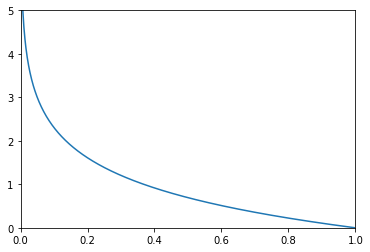

In [16]:
# -logのグラフ
x = np.arange(0.001, 1, 0.001)
y = -np.log(x)
plt.xlim(0, 1)
plt.ylim(0, 5)
plt.plot(x, y)

In [17]:
def single_cross_entropy_error(pred, ans):
    delta = 1e-7
    return -np.sum(ans * np.log(pred + delta))


print(single_cross_entropy_error(np.array(pred), np.array(ans)))
print(single_cross_entropy_error(0.6, 1))

0.510825457099338
0.510825457099338


### ミニバッチ学習
クロスエントロピー誤差の平均は以下の式で求められる。
$$ E = - \frac{1}{N} \sum_{n} \sum_{k} t_{nk} \log y_{nk} $$
この時、全体から任意の数のデータを抜き出し、そのクロスエントロピー誤差の平均を全体の平均と仮定し学習を進める方法がミニバッチ学習である。

In [18]:
print(train_img.shape)
print(train_label.shape)
print(test_img.shape)
print(test_label.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [19]:
train_size = train_img.shape[0]
print("train_size:{}".format(train_size))
batch_size = 10 #hyper_parameter
seed(0)
batch_mask = np.random.choice(train_size, batch_size) #np.arrayで取得
print("batch_mask:{}".format(batch_mask))
train_img_batch = train_img[batch_mask]
train_label_batch = train_label[batch_mask]
# print("train_img_batch:{}, \n train_label_batch:{}".format(train_img_batch, train_label_batch))

print("train_img_batch_shape:{}".format(train_img_batch.shape))
print("train_label_batch_shape:{}".format(train_label_batch.shape))
print("train_img_batch_ndim:{}".format(train_img_batch.ndim))

train_size:60000
batch_mask:[ 2732 43567 42613 52416 45891 21243 30403 32103 41993 57043]
train_img_batch_shape:(10, 784)
train_label_batch_shape:(10, 10)
train_img_batch_ndim:2


## ミニバッチ対応版_交差エントロピー誤差の実装

In [20]:
def cross_entropy_error(pred, ans):
    #1次元配列の場合は1行n列の2次元に変換する
    if pred.ndim ==1:
        pred = pred.reshape(1, pred.size)
        ans = pred.reshape(1, ans.size)
    
    batch_size = pred.shape[0] #行数を取得（行数＝データサイズ＝バッチサイズ） 
    print("batch_size:{}".format(batch_size))
    return -np.sum(ans * np.log(pred + 1e-7)) / batch_size

pred = np.array([[0.1, 0.5, 0.4], [0.2, 0.3, 0.5]])
ans = np.array([[0, 1, 0], [0, 0, 1]])

cross_entropy_error(pred, ans)

batch_size:2


0.6931469805599654

## 微分の定義
### analitic differentiation(解析的微分)
$$ \frac{df(x)}{dx} = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h} $$

### numerical differentiation(数値微分)
pythonなどのプログラミング言語で微分を実装するには、
$$ \frac{df(x)}{dx} = \frac{f(x + \Delta h) - f(x - \Delta h)}{2 \Delta h} $$

となる。

In [21]:
# 数値微分の実装

def num_diff(f, x):
    delta_h = 1e-4 #0.0001 これ以下は丸め誤差の影響が大きくなってしまう為注意
    return (f(x + delta_h) - f(x - delta_h)) / (2 * delta_h)

ここで、f(x)を以下と定義した際の、xの微分f'(x)をnumelcalに求める。
$$ f(x) = \sin(x) \\ f'(x) = \cos(x) $$

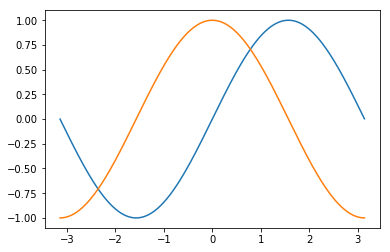

In [22]:
def f(x):
    return np.sin(x)

x = np.arange(-np.pi, np.pi, 0.01)
y = f(x)
diff_y = num_diff(f, x)
plt.plot(x, y)
plt.plot(x, diff_y)

## 偏微分
以下の関数に関して、x0とx1方向それぞれに関しての微分--偏微分--を求める。

$$ f(x_0, x_1) = x_0^2 + x_1^2 $$

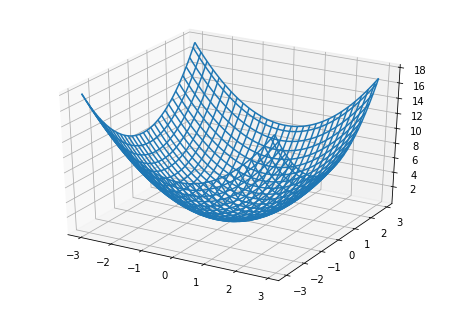

In [23]:
# 関数の定義
def f2(x):
    return x[0]**2 + x[1]**2

x = np.meshgrid(np.arange(-3, 3, 0.1), np.arange(-3, 3, 0.1))
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(x[0], x[1], f2(x))

### $ x_0 = 3, x_1 = 4$の時の$x_0$に対する偏微分$\frac{\partial f}{\partial x_0}$を求める

In [24]:
def partial_f2(x0):
    x1 = 4
    return x0**2 + x1**2

num_diff(partial_f2, 3)

6.00000000000378

## 勾配(gradient)

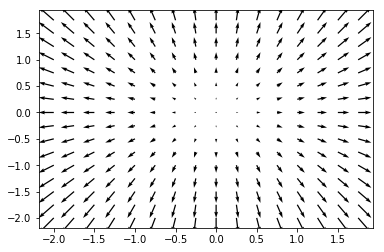

In [25]:
def num_grad(f, x): #f:関数, x:入力値(array)
    delta_h = 1e-4
    grad = np.zeros_like(x) #ベクトルで偏微分すると結果は元のベクトルと同じshape
    
    for idx in range(len(x)):
        tmp = x[idx].copy() #.copyをつけないとxをarrayで入力した際に正しい微分値が計算されない（fxh2の計算の際にtmpがリストの参照状態だとだめ）
        # f(x+h)の計算
        x[idx] = tmp + delta_h
        fxh1 = f(x)
        #f(x-h)の計算
        x[idx] = tmp - delta_h
        fxh2 = f(x)
        
        grad[idx] = (fxh1 - fxh2) / (2 * delta_h)
        x[idx] = tmp #値を元に戻す
    
    return grad
        
x = np.meshgrid(np.arange(-2, 2, 0.25), np.arange(-2, 2, 0.25))
grad = num_grad(f2, x)
plt.quiver(x[0], x[1], grad[0], grad[1])

# x = np.array([-1.0, 1.0])
# print(num_grad(f2, x))

# x = np.array([[-3.0, -1.0], [4.0, 1.0]])
# print(num_grad(f2, x))

## 勾配法
$$ \boldsymbol{x} = \boldsymbol{x} - \eta \frac{\partial f}{\partial \boldsymbol{x}} $$
$\eta:学習率 \\
\boldsymbol{x}:説明変数ベクトル$

In [26]:
# 関数の定義
def gradient_descent(f, init_x, lr=0.1, step_num=100):
    x = init_x
    x_history = []
    
    for i in range(step_num):
        x_history.append(x.copy()) #.copy()を用いて値渡しをしないと、xが更新されると連動してx_historyも更新されてしまう。
        grad = num_grad(f, x)
        x -= lr * grad
    plt.plot(np.array(x_history)[:,0], np.array(x_history)[:,1], 'o')
    return x

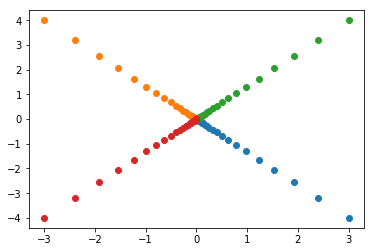

In [27]:
x = np.array([[3.0, -3.0, 3.0, -3.0],[-4.0, 4.0, 4.0, -4.0]])
grad = gradient_descent(f2, x)

In [28]:
def num_grad(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    print("grad: {}".format(grad))
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        print("idx: {}".format(idx))
        tmp_val = x[idx].copy()
        x[idx] = float(tmp_val) + h
        print("x[{}]: {}".format(idx, x[idx]))
        fxh1 = f(x) # f(x+h)
        print("fxh1: {}".format(fxh1))
        x[idx] = float(tmp_val) - h 
        print("x[{}]: {}".format(idx, x[idx]))
        fxh2 = f(x) # f(x-h)
        print("fxh2: {}".format(fxh2))
        grad[idx] = (fxh1 - fxh2) / (2*h)
        print("grad: {}".format(grad))
        
        x[idx] = tmp_val # 値を元に戻す
        it.iternext()   
        
    return grad

In [29]:
x = np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])

def test_f(x):
    return np.sum(x**2)

num_grad(test_f, x)

grad: [[0. 0. 0.]
 [0. 0. 0.]]
idx: (0, 0)
x[(0, 0)]: 1.0001
fxh1: 91.00020001
x[(0, 0)]: 0.9999
fxh2: 90.99980001
grad: [[2. 0. 0.]
 [0. 0. 0.]]
idx: (0, 1)
x[(0, 1)]: 2.0001
fxh1: 91.00040000999999
x[(0, 1)]: 1.9999
fxh2: 90.99960001
grad: [[2. 4. 0.]
 [0. 0. 0.]]
idx: (0, 2)
x[(0, 2)]: 3.0001
fxh1: 91.00060001
x[(0, 2)]: 2.9999
fxh2: 90.99940001
grad: [[2. 4. 6.]
 [0. 0. 0.]]
idx: (1, 0)
x[(1, 0)]: 4.0001
fxh1: 91.00080001
x[(1, 0)]: 3.9999
fxh2: 90.99920001
grad: [[2. 4. 6.]
 [8. 0. 0.]]
idx: (1, 1)
x[(1, 1)]: 5.0001
fxh1: 91.00100001
x[(1, 1)]: 4.9999
fxh2: 90.99900001
grad: [[ 2.  4.  6.]
 [ 8. 10.  0.]]
idx: (1, 2)
x[(1, 2)]: 6.0001
fxh1: 91.00120000999999
x[(1, 2)]: 5.9999
fxh2: 90.99880001
grad: [[ 2.  4.  6.]
 [ 8. 10. 12.]]


array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]])

In [30]:
np.random.randn(2, 3)


array([[-0.84272405,  1.96992445,  1.26611853],
       [-0.50587654,  2.54520078,  1.08081191]])

In [31]:
x = np.array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
print(np.exp(x))
np.sum(np.exp(x), axis=1)

[[  2.71828183   7.3890561   20.08553692]
 [ 54.59815003 148.4131591  403.42879349]]


array([ 30.19287485, 606.44010263])

In [32]:
np.random.choice(100, 10)

array([37, 25, 77, 72,  9, 20, 80, 69, 79, 47])

In [33]:
x = np.array([[[1.0, 2.0], [3.0, 4.0]], [[5.0, 6.0], [7.0, 8.0]]])

In [34]:
x.reshape(x.shape[0], -1)

array([[1., 2., 3., 4.],
       [5., 6., 7., 8.]])

In [35]:
from collections import OrderedDict

layers = OrderedDict()
layers['a'] = 'aa'
layers['c'] = 'cc'
layers['b'] = 'bb'
print(layers.keys())
print(layers.values())

odict_keys(['a', 'c', 'b'])
odict_values(['aa', 'cc', 'bb'])


In [36]:
layers

OrderedDict([('a', 'aa'), ('c', 'cc'), ('b', 'bb')])

In [37]:
layers_values = list(layers.values())
print(layers_values)

['aa', 'cc', 'bb']


In [38]:
layers_values.reverse()
print(layers_values)

['bb', 'cc', 'aa']


In [41]:
#例　3行3列2色の画像データが10枚
x = np.random.rand(10, 2, 3, 3)
print(x)

[[[[0.25913472 0.00844614 0.88141263]
   [0.5321102  0.16113456 0.8304731 ]
   [0.07174133 0.85362482 0.01615882]]

  [[0.45489035 0.35396682 0.64899866]
   [0.55021602 0.35380623 0.98605865]
   [0.4293438  0.48469596 0.62881046]]]


 [[[0.09916065 0.88142046 0.56600262]
   [0.67568921 0.92263965 0.64234101]
   [0.07173451 0.08357854 0.56823127]]

  [[0.11666522 0.04288448 0.38366199]
   [0.97811242 0.54971025 0.88481189]
   [0.45285558 0.93065546 0.02991454]]]


 [[[0.71945011 0.95535789 0.46956673]
   [0.25385505 0.65150422 0.38197408]
   [0.33854227 0.35738787 0.41166942]]

  [[0.4508952  0.16670467 0.67627376]
   [0.84019809 0.73429208 0.41958527]
   [0.16613637 0.71181921 0.05265921]]]


 [[[0.50194637 0.94979603 0.35149556]
   [0.73367399 0.93470658 0.11617075]
   [0.60915082 0.56314887 0.49358281]]

  [[0.5110539  0.39878761 0.13569285]
   [0.21012083 0.05637154 0.83110426]
   [0.01520531 0.22718558 0.84246021]]]


 [[[0.91602337 0.32347808 0.68275535]
   [0.02649326 0.93867139 

# strideとpadding

$$ OH = \frac{H + 2P - FH}{S} + 1 $$
$$ OW = \frac{W + 2P - FH}{S} + 1 $$

(OH, OW): 出力サイズ  
(H, W): 入力サイズ  
(FH, FW): フィルターサイズ  
P: padding  
S: stride  

# convolution / pooling layerの実装

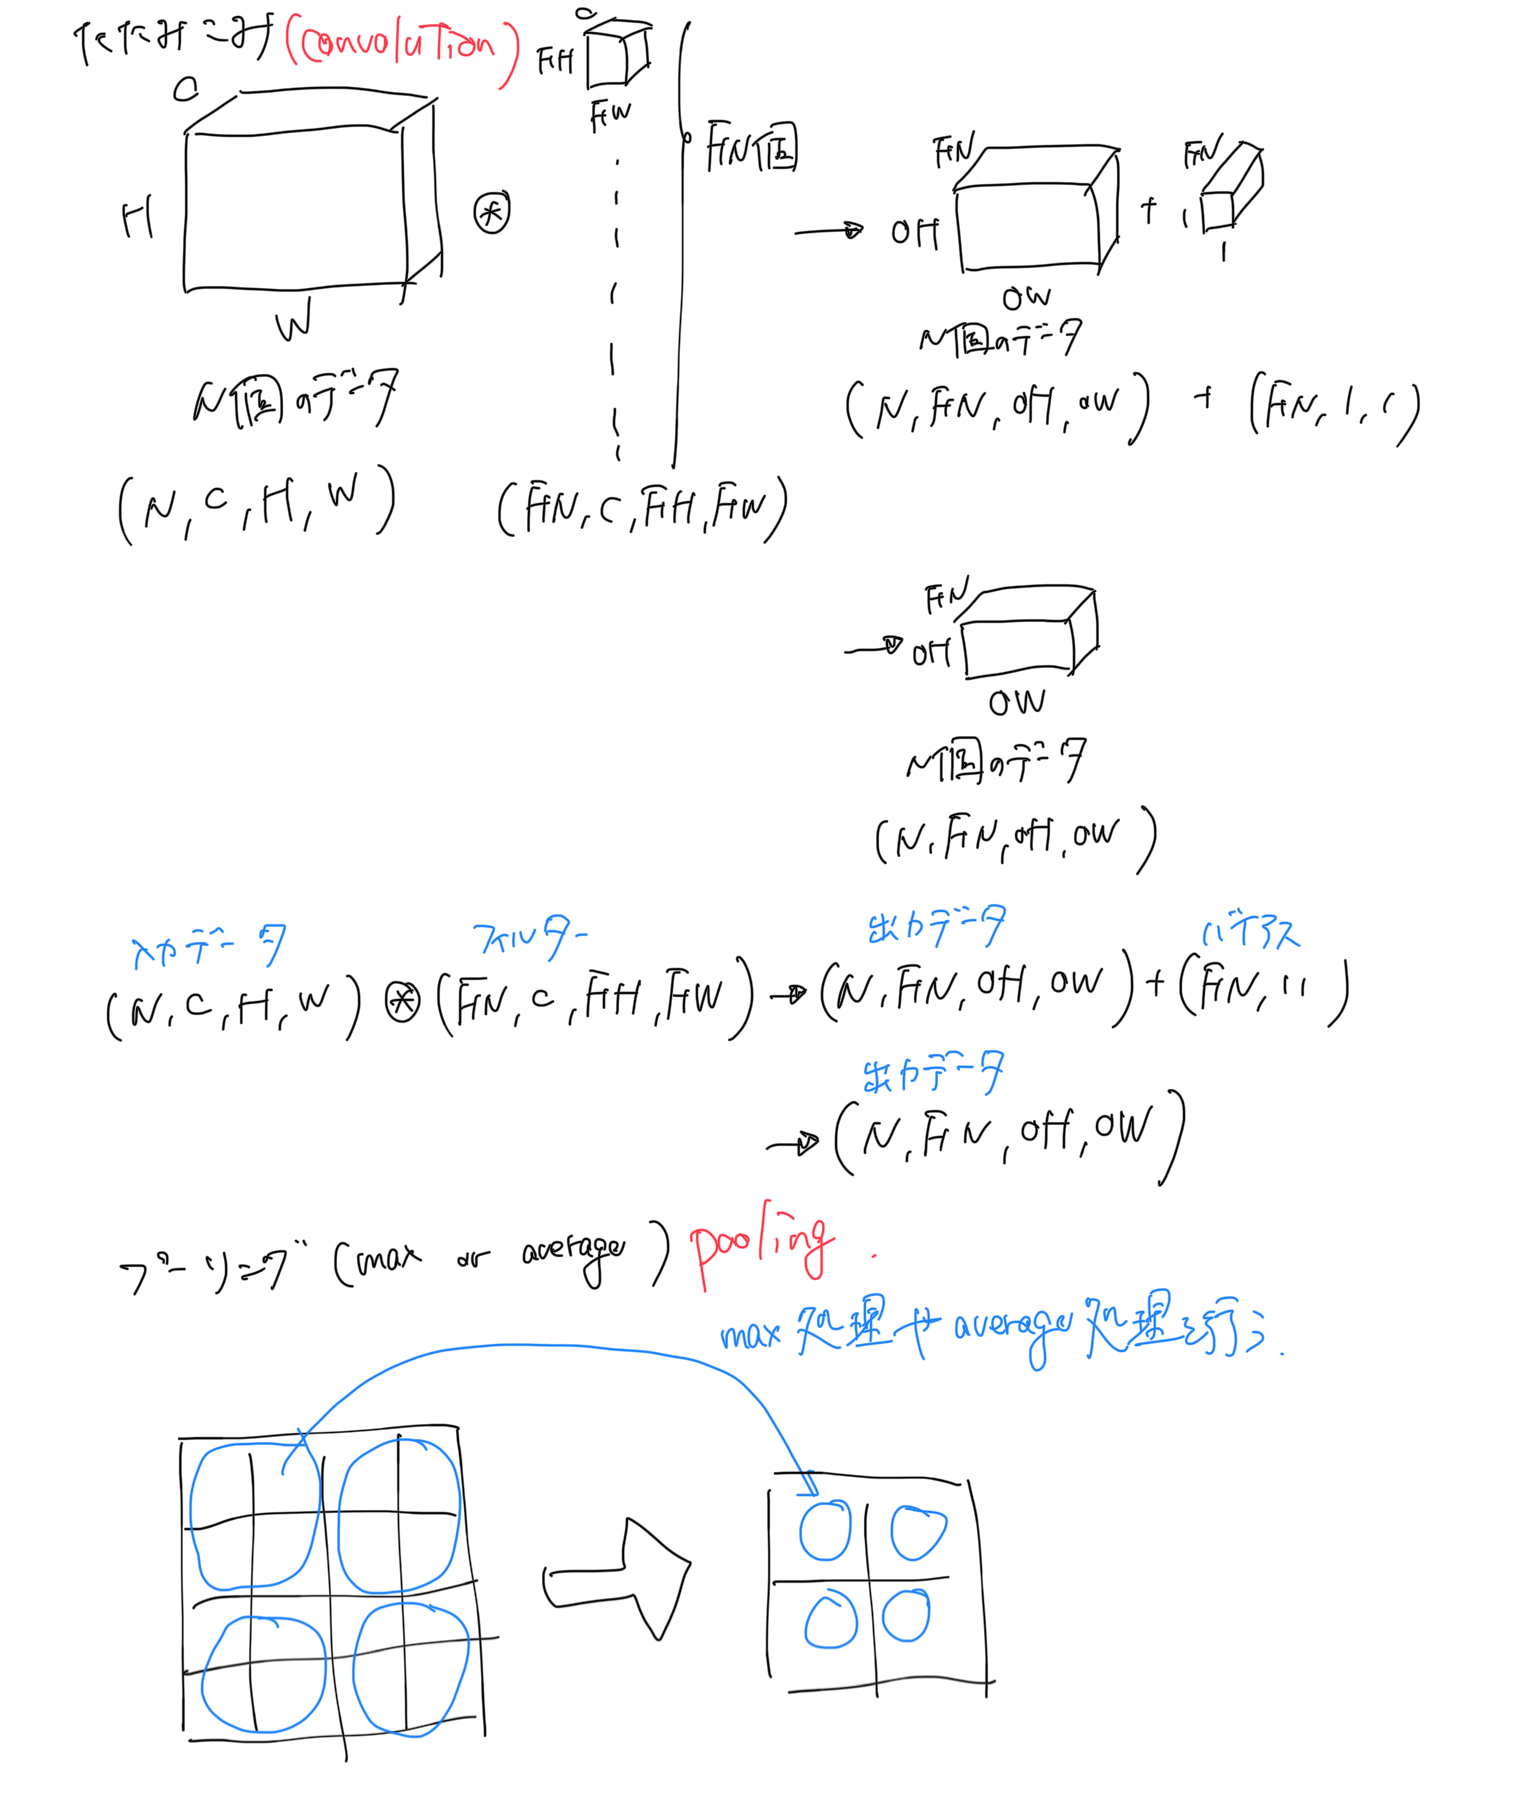

## 4次元データのim2colによる展開

In [56]:
# 4次元データの重みを2次元に展開
W = np.array([[[[1,2], [3, 4]], [[5, 6], [7, 8]]], [[[9,10], [11, 12]], [[13, 14], [15, 16]]]])
print(W.shape)
FN, c, FH, FW = W.shape
W = W.reshape(FN, -1)
print(W)

(2, 2, 2, 2)
[[ 1  2  3  4  5  6  7  8]
 [ 9 10 11 12 13 14 15 16]]


In [57]:
# im2colの定義
def im2col(input_data, filter_h, filter_w, stride=1, pad=0):
    """
    Parameters
    ----------
    input_data : (データ数, チャンネル, 高さ, 幅)の4次元配列からなる入力データ
    filter_h : フィルターの高さ
    filter_w : フィルターの幅
    stride : ストライド
    pad : パディング
    Returns
    -------
    col : 2次元配列
    """
    N, C, H, W = input_data.shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1

    img = np.pad(input_data, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')
    col = np.zeros((N, C, filter_h, filter_w, out_h, out_w))

    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            col[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]

    col = col.transpose(0, 4, 5, 1, 2, 3).reshape(N*out_h*out_w, -1)
    return col

In [68]:
im = np.array([[[[1, 2, 3, 4], [5, 6, 7, 8]], [[9, 10, 11, 12], [13, 14, 15, 16]]], [[[17, 18, 19, 20], [21, 22, 23, 24]], [[25, 26, 27, 28], [29, 30, 31, 32]]]])
col = im2col(im, FH, FW)
print(col)
out = np.dot(col, W.T)
print(out)
print(out.reshape(2, 2, 1, -1))

[[ 1.  2.  5.  6.  9. 10. 13. 14.]
 [ 2.  3.  6.  7. 10. 11. 14. 15.]
 [ 3.  4.  7.  8. 11. 12. 15. 16.]
 [17. 18. 21. 22. 25. 26. 29. 30.]
 [18. 19. 22. 23. 26. 27. 30. 31.]
 [19. 20. 23. 24. 27. 28. 31. 32.]]
[[ 352.  832.]
 [ 388.  932.]
 [ 424. 1032.]
 [ 928. 2432.]
 [ 964. 2532.]
 [1000. 2632.]]
[[[[ 352.  832.  388.]]

  [[ 932.  424. 1032.]]]


 [[[ 928. 2432.  964.]]

  [[2532. 1000. 2632.]]]]


In [59]:
def col2im(col, input_shape, filter_h, filter_w, stride=1, pad=0):
    """
    Parameters
    ----------
    col :
    input_shape : 入力データの形状（例：(10, 1, 28, 28)）
    filter_h :
    filter_w
    stride
    pad
    Returns
    -------
    """
    N, C, H, W = input_shape
    out_h = (H + 2*pad - filter_h)//stride + 1
    out_w = (W + 2*pad - filter_w)//stride + 1
    col = col.reshape(N, out_h, out_w, C, filter_h, filter_w).transpose(0, 3, 4, 5, 1, 2)

    img = np.zeros((N, C, H + 2*pad + stride - 1, W + 2*pad + stride - 1))
    for y in range(filter_h):
        y_max = y + stride*out_h
        for x in range(filter_w):
            x_max = x + stride*out_w
            img[:, :, y:y_max:stride, x:x_max:stride] += col[:, :, y, x, :, :]

    return img[:, :, pad:H + pad, pad:W + pad]

In [67]:
test = np.arange(12)
test.reshape(2, -1).reshape(1, 2, 3, -1)

array([[[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]]]])